In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


Membaca data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/PSD/Employee.csv')
df = pd.DataFrame(data)
print(df)



      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDo

Menampilkan data yang tidak lengkap


In [4]:
print('Data yang kosong')
print(df.isnull().sum())
print(df[df.isnull().any(axis=1)])

Data yang kosong
Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  5
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64
     Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
16   Bachelors         2014  Bangalore            3   34  Female         NaN   
65   Bachelors         2018  Bangalore            3   40    Male         NaN   
127  Bachelors         2015       Pune            3   27    Male         NaN   
435  Bachelors         2015       Pune            3   26  Female         NaN   
512  Bachelors         2015  Bangalore            3   28  Female         NaN   

     ExperienceInCurrentDomain  LeaveOrNot  
16                           2           0  
65                           1           1  
127                          5           0  
435                          4

Menghapus data yang tidak lengkap


In [5]:
df.dropna(inplace=True)

Memilih fitur untuk variabel X dan Y


In [6]:
X = data[['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain']]
Y = data['LeaveOrNot']

One-hot encoding untuk fitur kategorikal


In [7]:
categorical_features = ['Education', 'City', 'Gender', 'EverBenched']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)
print(X_encoded)


      JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  \
0            2017            3   34                          0   
1            2013            1   28                          3   
2            2014            3   38                          2   
3            2016            3   27                          5   
4            2017            3   24                          2   
...           ...          ...  ...                        ...   
4648         2013            3   26                          4   
4649         2013            2   37                          2   
4650         2018            3   27                          5   
4651         2012            3   30                          2   
4652         2015            3   33                          4   

      Education_Masters  Education_PHD  City_New Delhi  City_Pune  \
0                 False          False           False      False   
1                 False          False           False       True   


Pembagian dataset menjadi train dan test


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.3, random_state=42)



Membuat model Naive Bayes


In [9]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print('Algoritma Naive Bayes')
print(nb)


Algoritma Naive Bayes
GaussianNB()


Memprediksi nilai target pada data test


In [10]:
y_pred = nb.predict(X_test)


:Evaluasi model klasifikasi menggunakan metrik yang diminta


In [11]:
print("Accuracy naive bayes:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy naive bayes: 0.7106017191977078
Precision: 0.5740740740740741
Recall: 0.5861344537815126
F1 Score: 0.58004158004158


Mendapatkan confusion matrix


In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

Plot confusion matrix menggunakan heatmap


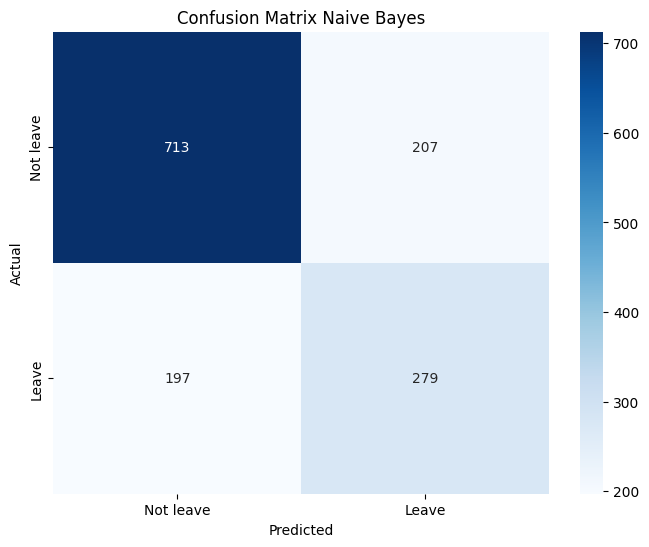

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not leave', 'Leave'], yticklabels=['Not leave', 'Leave'])
plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()